<a href="https://colab.research.google.com/github/Ludmila-Vivas/Aprendizaje-Automatico-1/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **🔸 K-means**

<b>Ejemplo a trabajar:</b>

Es un dataset tomado de Kaggle [Shopping](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python)

<b>Planteamiento del problema:</b>

Usted es el propietario del centro comercial y quiere entender a los clientes que pueden ser fácilmente segmentados para que se puede dar al equipo de marketing y planificar la estrategia en consecuencia.

In [25]:
#Importo las librerias que se utilizaran
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, silhouette_samples

In [26]:
#Cargo el dataset
path = "https://www.dropbox.com/s/zy9k5bekzr16ovr/mall_customers.csv?dl=1"

In [27]:
#Lo cambio a formato dataframe
df = pd.read_csv(path)
df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [28]:
#Cambio el nombre de las columnas
df.columns = ["ID", "Genero", "Edad", "Ingresos", "Puntuacion"]
df.head(5)

,ID,Genero,Edad,Ingresos,Puntuacion
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


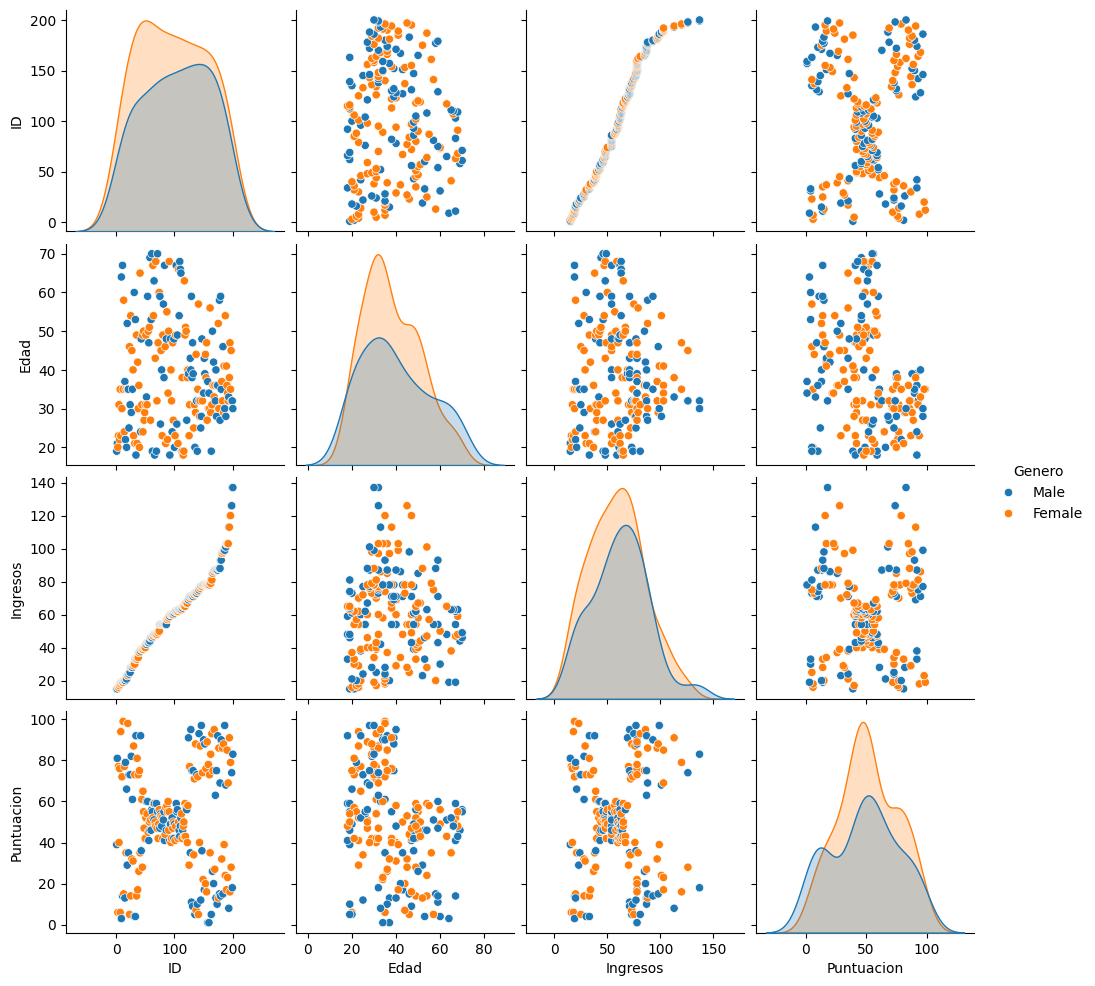

In [29]:
#Creo un cuadricula de graficos de los diferentes features, diferenciando por color al generos del cliente.
sns.pairplot(df, hue="Genero")

Desde aquí voy a continuar con los datos de **Ingreso** y **Puntuación** únicamente.

In [30]:
x = df[["Ingresos", "Puntuacion"]]

In [31]:
#Preprocesamiento de los datos
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

⏩ Armado y entrenamiento del modelo con **5** grupos

In [32]:
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(x_scaled)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_

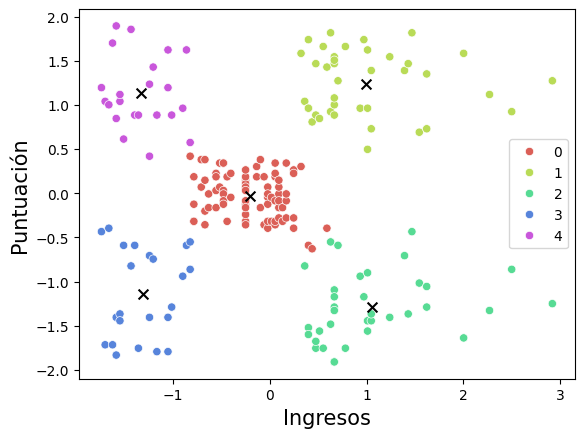

In [33]:
#Grafico del modelo
sns.scatterplot(x=x_scaled[:,0],y=x_scaled[:,1],hue=labels,legend='full',palette=sns.color_palette("hls", 5));
plt.xlabel("Ingresos",fontsize=15);plt.ylabel("Puntuación",fontsize=15);
plt.scatter(centroids[:,0],centroids[:,1],marker='x',s=50,color='k');

⏩ Armado y entrenamiento del modelo con **3** grupos

In [34]:
x = df[["Ingresos", "Puntuacion"]]

scaler=StandardScaler()

x_scaled=scaler.fit_transform(x);

kmeans=KMeans(n_clusters=3,random_state=0)
kmeans.fit(x_scaled)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_

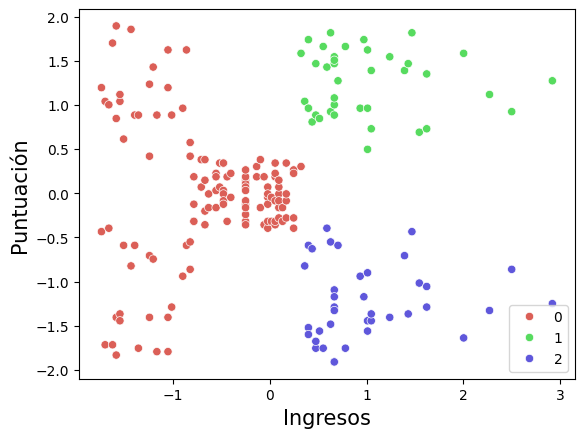

In [35]:
#Grafico del modelo
sns.scatterplot(x=x_scaled[:,0],y=x_scaled[:,1],hue=labels,legend='full',palette=sns.color_palette("hls", 3));
plt.xlabel("Ingresos",fontsize=15);plt.ylabel("Puntuación",fontsize=15);

**📏 Metricas de medición**

1) Suma de las distancias cuadráticas de los puntos a sus centroides.

In [36]:
sq_distance = []
k_values = range(2,10)

for k in k_values:
  kmeans = KMeans(n_clusters=k, random_state=0)
  kmeans.fit(x_scaled)
  sq_distance.append(kmeans.inertia_)

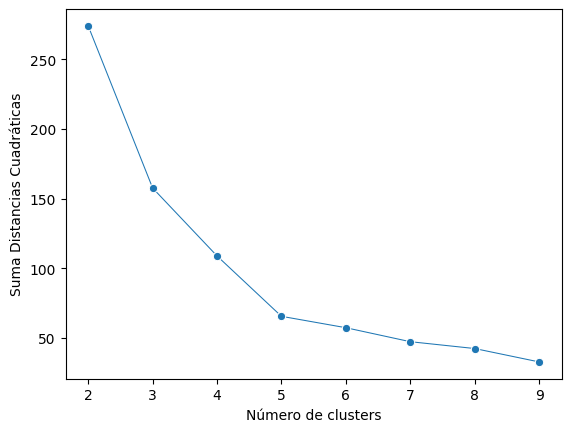

In [38]:
sns.lineplot(x=k_values,y=sq_distance,marker='o',size=30,legend=False);
plt.ylabel('Suma Distancias Cuadráticas');plt.xlabel('Número de clusters');

Se puede observar que k=5 es una buena opción, ya que los números posteriores ya no implican un cambio significativo.

2) Silhouette Score

In [39]:
sil = []
k_values = range (2,10)

for k in k_values:
  kmeans = KMeans(n_clusters=k, n_init=10, random_state=0)
  kmeans.fit(x_scaled)
  score = silhouette_score(x_scaled, kmeans.labels_)
  sil.append(score)

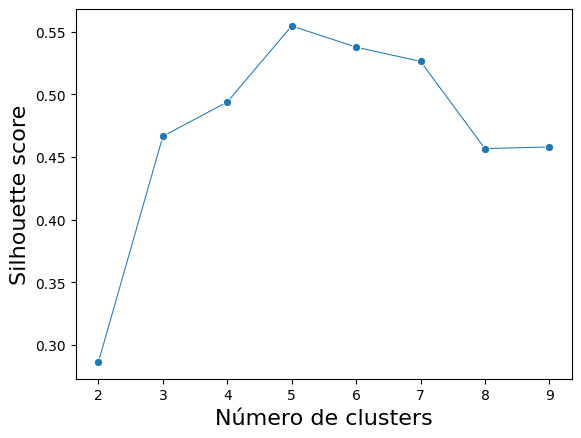

In [40]:
sns.lineplot(x=k_values,y=sil,marker='o',size=33,legend=False);
plt.ylabel('Silhouette score',fontsize=16);plt.xlabel('Número de clusters',fontsize=16);

En este gráfico se puede ver que el número optimo es k=5 también, ya que mientras más cercano a 1 es significa que está mejor etiquetado.

3) Calinski-Harabasz Score

In [41]:
from sklearn.metrics import calinski_harabasz_score

ch_score = []
k_values = range (2,9)

for k in k_values:
  kmeans = KMeans(n_clusters=k, n_init=10, random_state=0)
  kmeans.fit(x_scaled)
  score = calinski_harabasz_score(x_scaled, kmeans.labels_)
  ch_score.append(score)

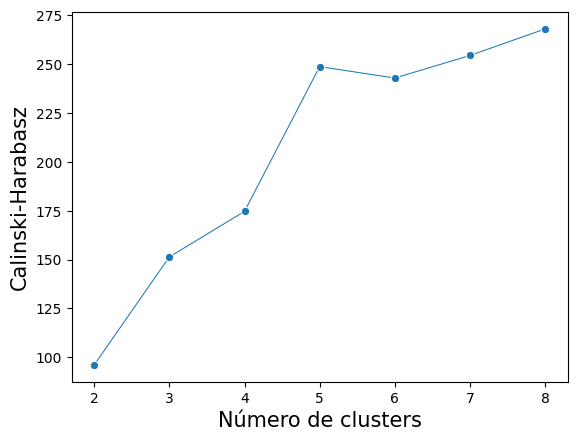

In [43]:
sns.lineplot(x=k_values,y=ch_score,marker='o',size=30,legend=False);
plt.ylabel('Calinski-Harabasz',fontsize=15);plt.xlabel('Número de clusters',fontsize=15);

Al igual que los casos anteriores, el número ideal es k=5. Vemos en el gráfico que en ese número es donde se posee el pico de aumento, luego si bien sigue aumentando, ya no es tan significativo.



---



# **🔸 DBSCAN**

In [1]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [2]:
#Generación de datos de ejemplo.
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

In [3]:
#Se aplica DBSCAN con radio 0.5 y minimo de 5 vecinos.
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X)

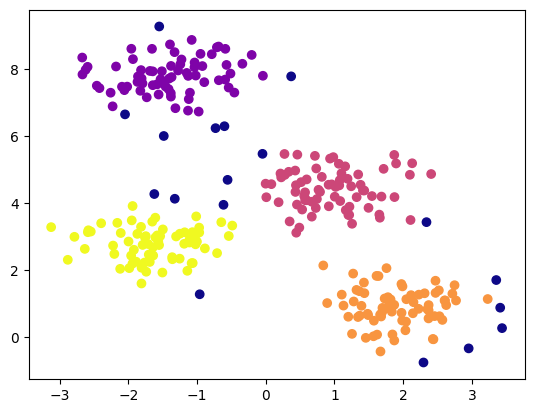

In [4]:
#Grafico del modelo
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='plasma')
plt.show()

In [5]:
#Se puede ver como -1 los puntos considerados ruido
labels

array([ 2,  0,  1,  0,  2, -1,  3,  1,  0,  0,  3,  0,  1,  0,  2,  1,  1,
        2,  3,  3,  2,  2,  1,  3,  3, -1,  2,  1,  3,  1,  0,  0,  1,  0,
        0,  0,  0,  0,  3,  2,  1,  3, -1,  1,  3,  3,  0,  3,  0,  2,  3,
        2,  0,  2,  2,  3,  0,  3,  0,  2,  0,  1, -1,  3,  3,  3,  0,  2,
        0,  3,  1,  3,  0,  3,  3,  0,  3,  1,  2,  0,  2,  1,  2,  2,  0,
        1,  2,  1, -1,  0,  1,  2,  0,  3,  3,  1,  2,  2,  1,  3,  0,  2,
        0,  2,  1,  2,  2,  1,  0,  1,  3,  3,  2,  0,  2,  1,  0,  2,  2,
        1,  3,  2,  3,  2,  2,  2,  2,  3,  2,  3,  0,  3,  3,  2,  0,  3,
        3,  0,  1,  0,  0,  3,  1, -1,  1,  3,  0,  1,  0,  0,  0,  1, -1,
        1,  2,  3,  0,  3,  2,  1,  0,  1,  1,  2,  1,  3, -1,  1,  2,  1,
        1,  0,  2,  1, -1,  0,  2,  2,  1,  3,  2,  1,  3,  3,  1,  1,  1,
        1,  2,  0,  1,  3,  1,  1,  3,  3,  3,  1,  3,  0,  1,  3,  2,  3,
        1, -1,  3,  0,  1,  0,  1,  3,  1,  1,  0,  3,  3,  2, -1,  1,  0,
        2,  2,  3,  2,  3